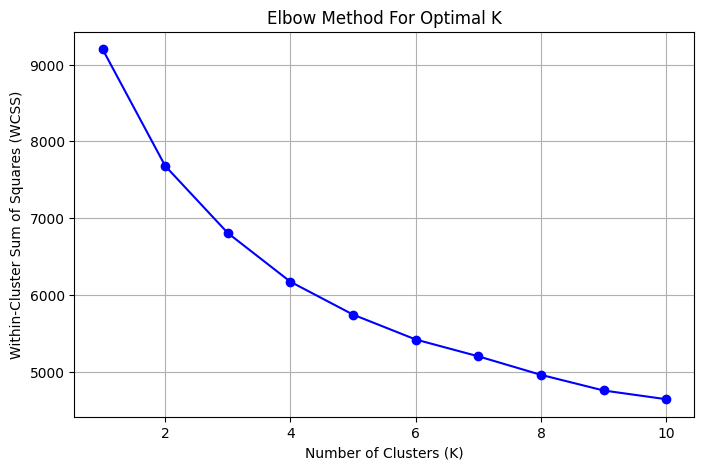

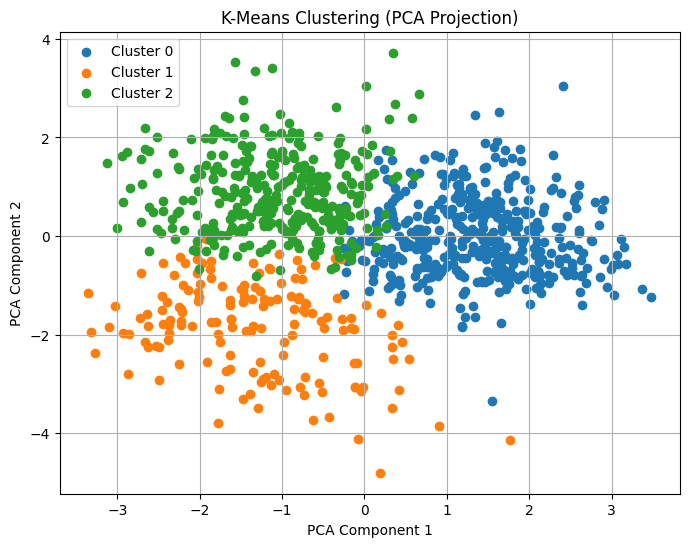

✅ Silhouette Score for K=3: 0.1760


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Load the dataset
try:
    df = pd.read_csv("heart_disease_uci.csv")  # Ensure this file is in the same directory
except FileNotFoundError:
    raise FileNotFoundError("❌ File not found. Please upload 'heart_disease_uci.csv' to the current directory.")

# Step 2: Clean and preprocess data
df_clean = df.drop(columns=["id", "dataset", "ca", "thal", "slope"], errors='ignore')

# Drop rows with missing target values
df_clean = df_clean.dropna(subset=["num"])

# Encode categorical columns
categorical_cols = df_clean.select_dtypes(include="object").columns
for col in categorical_cols:
    df_clean[col] = LabelEncoder().fit_transform(df_clean[col].astype(str))

# Drop the target column to perform unsupervised learning
if "num" in df_clean.columns:
    df_features = df_clean.drop(columns=["num"])
else:
    df_features = df_clean.copy()

# Handle missing values
imputer = SimpleImputer(strategy="mean")
X_imputed = pd.DataFrame(imputer.fit_transform(df_features), columns=df_features.columns)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Step 3: Optional - PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Elbow Method to find optimal K
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, 'bo-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method For Optimal K")
plt.grid(True)
plt.show()

# Step 5: Choose optimal K (assume from elbow it's K=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Step 6: Add cluster labels to original data
df_clustered = df_clean.copy()
df_clustered['Cluster'] = cluster_labels

# Step 7: Visualize Clusters using PCA-reduced 2D space
plt.figure(figsize=(8, 6))
for cluster_id in range(optimal_k):
    plt.scatter(X_pca[cluster_labels == cluster_id, 0],
                X_pca[cluster_labels == cluster_id, 1],
                label=f"Cluster {cluster_id}")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering (PCA Projection)")
plt.legend()
plt.grid(True)
plt.show()

# Step 8: Evaluate Clustering using Silhouette Score
sil_score = silhouette_score(X_scaled, cluster_labels)
print(f"✅ Silhouette Score for K={optimal_k}: {sil_score:.4f}")
